In [2]:
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

from tifffile import imread, imsave

%reload_ext autoreload
%autoreload 2

from kymographs import KymoSpider

Populating the interactive namespace from numpy and matplotlib


# Loading data
_Note:_ The example below loads multiple exportet stacks and concatenates them. At the end the only variable that need to be set to something meaningful have to be `stack`, `seg`, and `flow`. The data for these variables you can generate as can be seen in `TimeLapseData2d` at the very bottom. (This was true when I wrote this text... ;)

In [3]:
folder = '/Users/markslabodnick/Dropbox/ProjectGoldstein/Slippage_Test_Films/Coupled_Calibration/export/'

stack1 = imread(folder+'stack01.tiff')
stack1 = np.swapaxes(stack1,1,0)
#stack2 = imread(folder+'stack02.tiff')
#stack2 = np.swapaxes(stack2,1,0)
#stack = np.concatenate([stack1,stack2],axis=1)
stack = stack1

seg1 = imread(folder+'seg01.tiff')
#seg2 = imread(folder+'seg02.tiff')
#seg = np.concatenate([seg1,seg2])
seg = seg1


flow1 = imread(folder+'flow01.tiff')
flow1 = np.swapaxes(flow1,1,0)
#flow2 = imread(folder+'flow02.tiff')
#flow2 = np.swapaxes(flow2,1,0)
#flow = np.concatenate([flow1,flow2],axis=1)
flow = flow1

# Create the KymoSpider object

In [12]:
# Parameters are: 
# -- number of legs
# -- leg length in pixels
# -- (x,y)-tuple defining the kymo spider's center point in the image
# -- optional parameter rotation in degrees (convention: make leg 1 point towards the Ea/Ep interface!)

#leg01
#ks = KymoSpider(1,90,(179,299),rotation=253.768)

#leg02
#ks = KymoSpider(1,100,(193,299),rotation=-51.248)

#leg03 -- FOR SOME REASON THE ALGORITHM IS HAVING ISSUES WITH THIS LEG
ks = KymoSpider(1,100,(186,291),rotation=-6.4)

#leg04
#ks = KymoSpider(1,105,(186,290),rotation=-87.374)

#leg05 -- Algorithm doesn't like this one either
#ks = KymoSpider(1,95,(186,291),rotation=233.781)

#leg06
#ks = KymoSpider(1,105,(168,286),rotation=61.607)

### Check if the created spider is placed sinsibly
_Note:_ you will be shown the first and the last loaded frame AND the whole thing will only work if the spider does fit within the image entirely!

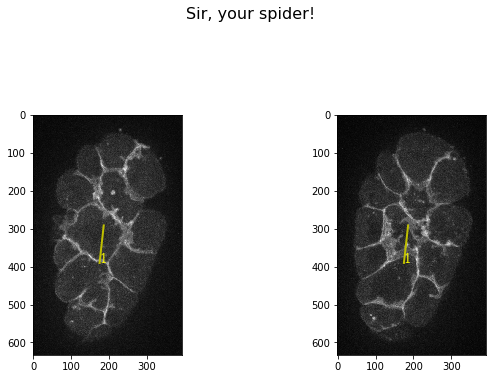

In [13]:
pylab.rcParams['figure.figsize'] = (10, 15)
fig = plt.figure()
ks.plot_spider_loc_on_images(fig,stack[1],flow)

# Compute Kymographs and Plot Data

In [14]:
len(ks.kymographs[0])

TypeError: object of type 'NoneType' has no len()

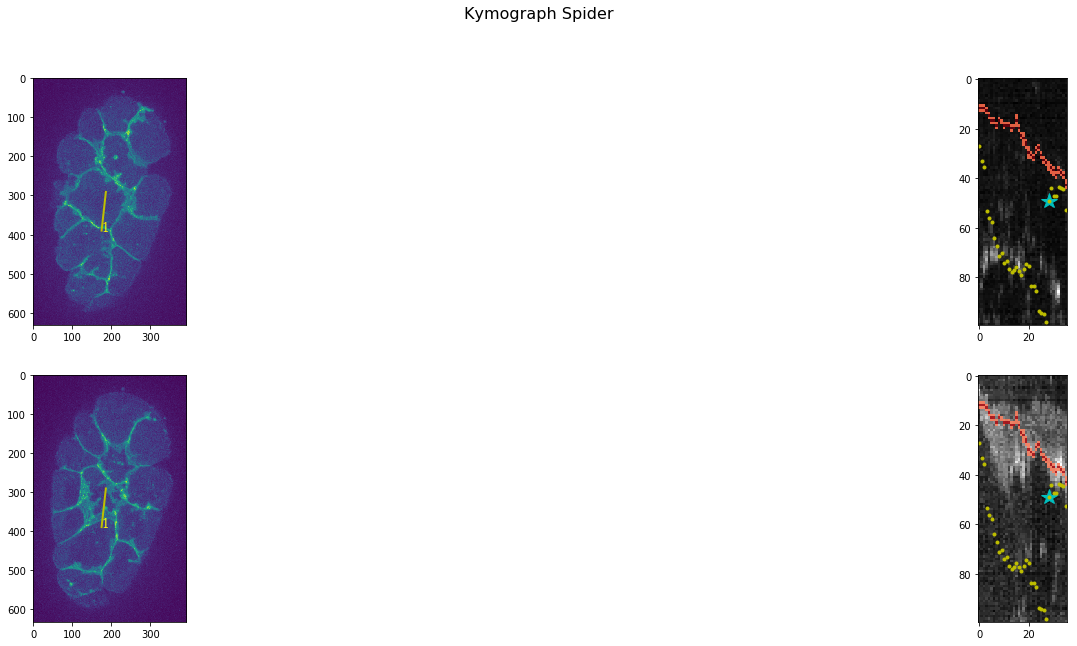

In [15]:
ks.compute(stack[0],stack[1],seg,flow)

# Plotting from here on...
pylab.rcParams['figure.figsize'] = (30, 10) # set figure size
fig = plt.figure()
ks.plot(fig,stack[1][0],stack[1][-1],15,True)

# Use the next line if you want to save the plot to disc
#fig.savefig('/Users/jug/Desktop/muh.png')

### Plotting column flow stats

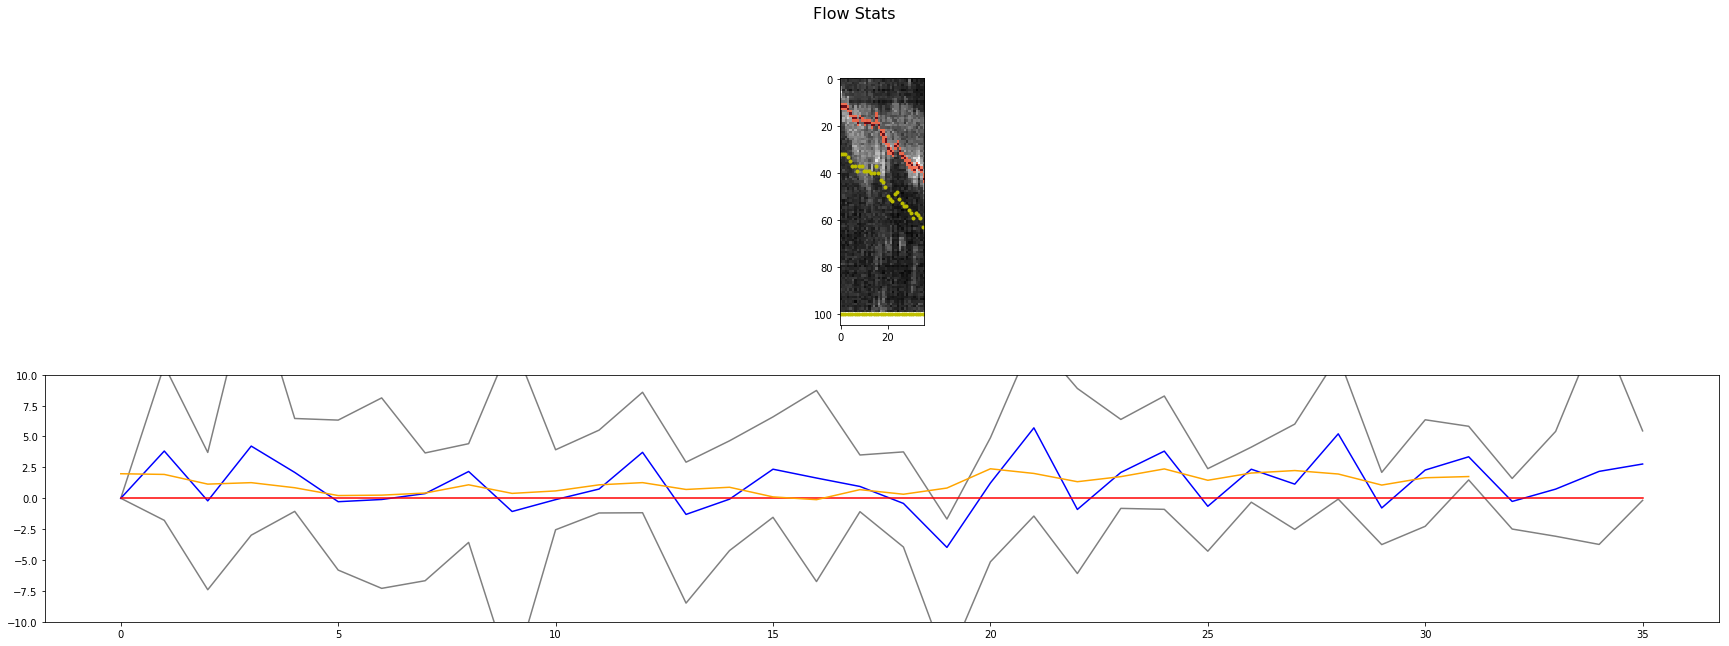

In [16]:
pylab.rcParams['figure.figsize'] = (30, 10) # set figure size
fig_stats = plt.figure()
ks.plot_column_flow_stats(fig_stats, offset_from_membrane=20, length=None)

ValueError: invalid literal for int() with base 10: '*'

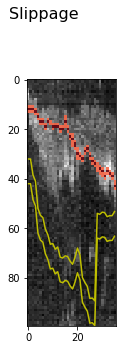

In [17]:
pylab.rcParams['figure.figsize'] = (30, 10) # set figure size
fig_slip = plt.figure()
(s, ss) = ks.plot_slippage(fig_slip, delta_t=5, offset_from_membrane=20, length=10, move_window=True, smoothing_width=5)

In [10]:
# get the y-values of the k-th legs blue line
k=0
s[k][1]

array([  4.92999337,   7.95276658,   2.43151261,  -6.874942  ,
        -5.5069221 ,  -3.53936021,   4.45828065,   9.76240577,
        12.07915053,  12.75695865,  17.72872946,  17.39345505,
        10.3324259 ,  13.70922994,  11.04995466,  15.10525035,
        12.29208146,  15.34211918,  12.84080849,  14.07046733,
        12.47739865,   7.95644042,  -0.74135294,   2.9982006 ,
         1.98592434,  -1.86895504,  -3.13139983,  -8.4391413 ,
       -10.09926451,  -4.69623241,  -3.13032854])

In [11]:
k=0
print np.array(s[k][1]).max()

17.7287294569


# Export data to CSV file

In [ ]:
data_filename = folder+'data.jug'
str_now = datetime.datetime.now().strftime("%B %d, %Y at %I:%M%p")

with open(data_filename, "w") as data_file:
    data_file.write("# Exported after processing '%s' on %s\n\n" % (filename,str_now))
    for t in range(len(frames)):
        data_file.write("t, %d\n"%t)
        data_file.write("c, %d, %d\n"%(centers[t][0],centers[t][1]))
        data_file.write("r, %d\n"%radii[t])
        polygone = polygones[t][0] # we will only export the first polygone here!
        for p in range(len(polygone)):
            #absolute point coordinates: 
            #  data_file.write("p%d, %d, %d\n"%(p,polygone[p][0],polygone[p][1]))
            data_file.write("p%d, %d, %d\n"%(p,polygone[p][0]-centers[t][0],polygone[p][1]-centers[t][1]))
        data_file.write("\n")